**Heart Attack Analysis**

Heart attacks happen when the heart doesn't get enough blood, or more accurately, oxygen, because blood contains oxygen. If your heart doesn't get enough oxygen, you're more likely to have a heart attack. This is due to a blood clot, a lack of blood supply, and a lack of oxygen. Chest pain, high blood pressure, and high cholesterol levels are all signs of a heart attack.

**Summary**

There are 14 columns and 303 rows in the dataset. Only a few of the 14 columns are numerical variables, while the rest are categorical variables. 'age', 'trtbps', 'chol', 'thalach', 'oldpeak' are numerical columns, while'sex', 'cp', 'caa', 'fbs','restecg', 'exng','slp', 'thall' are categorical columns.Because the ‘output' characteristic takes value 1 in the case of a higher risk of heart attack and 0 in the case of a lower risk of heart attack, this is the responsible variable.
There were no null values in this dataset, but it did have one duplicated value, which was eliminated.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
ha =pd.read_excel("data_heart.xlsx")

In [5]:
ha.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
ha.shape

(303, 14)

In [7]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
ha.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
ha.drop_duplicates(inplace=True)
ha.reset_index(drop=True, inplace=True)
ha.shape

(302, 14)

**Univariate Analysis**

Few important features which can determine about the output

**Categorical**

**Target**

<AxesSubplot:>

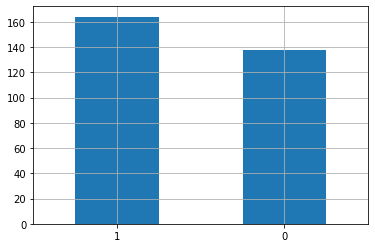

In [11]:
ha['target'].value_counts().plot(kind='bar',grid=True,rot=0)

**Sex**

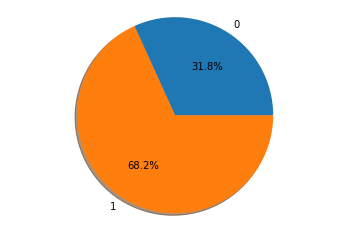

In [12]:
labels= ha['sex'].astype('category').cat.categories.tolist()
counts= ha['sex'].value_counts()
sizes= [counts[var_cat] for var_cat in labels]
figx1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
#autopct helps in showing the percentage on the pie chart
ax1.axis('equal')
plt.show()

This shows that 68.3% of the pateints belongs to the sex which is represented by 1 , it can be male or female .

<AxesSubplot:title={'center':'age'}, xlabel='sex'>

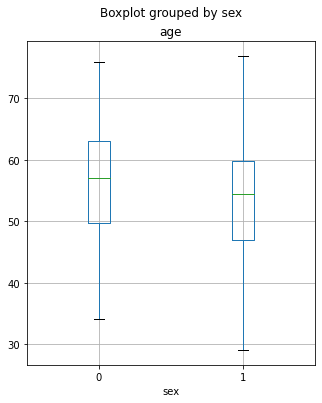

In [13]:
ha.boxplot('age','sex',rot = 0,figsize=(5,6),grid=True)

Type Markdown and LaTeX:  𝛼2

[Text(0.5, 1.0, 'Thallium Stress Test')]

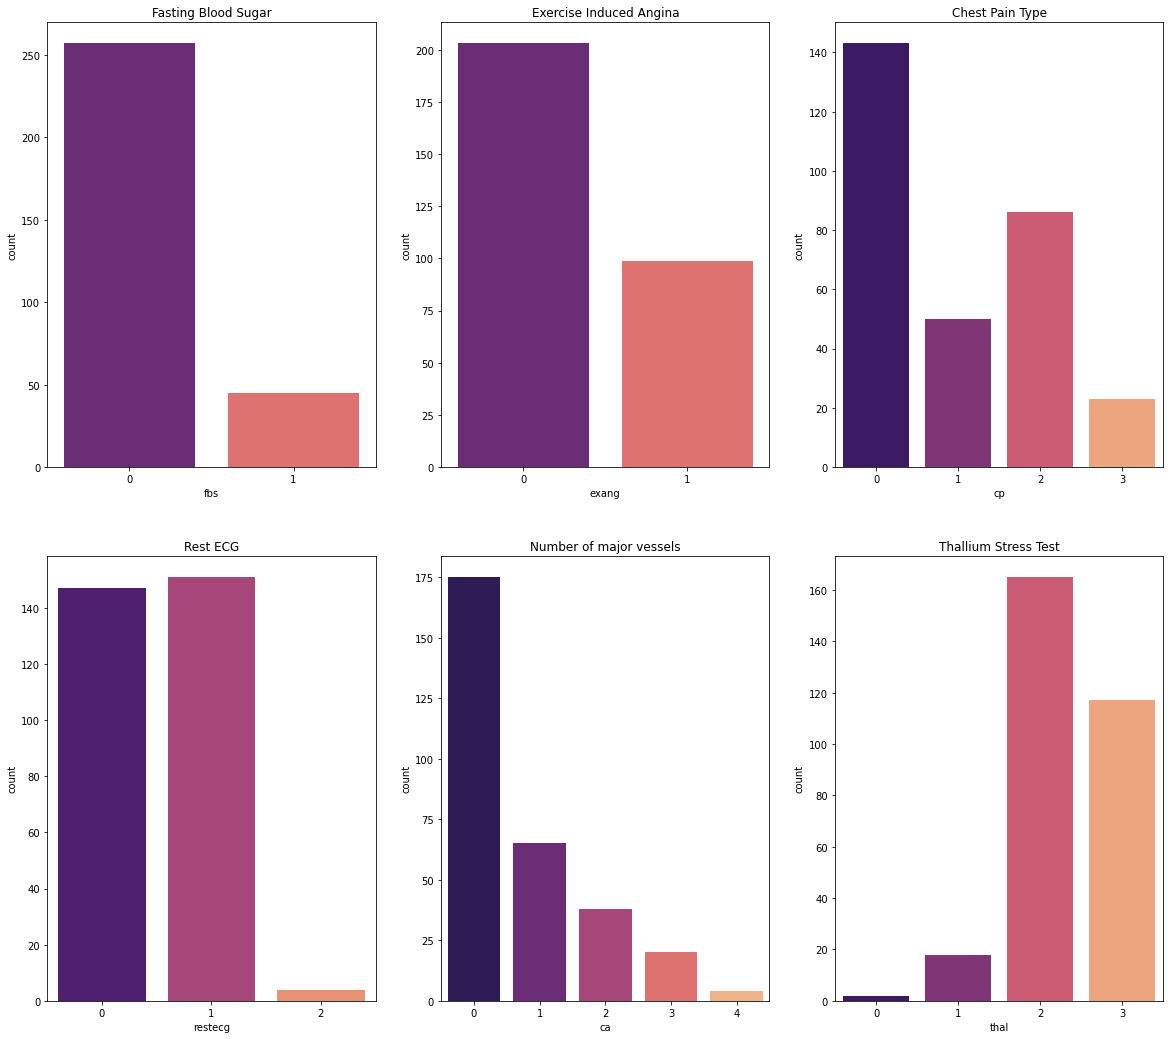

In [16]:
fig, ax = plt.subplots(2,3, figsize=(20,18))
sns.countplot(x='fbs', data=ha, palette='magma', ax=ax[0][0]).set(title='Fasting Blood Sugar')
sns.countplot(x='exang', data=ha, palette='magma', ax=ax[0][1]).set(title='Exercise Induced Angina')
sns.countplot(x='restecg', data=ha, palette='magma', ax=ax[1][0]).set(title='Rest ECG')
sns.countplot(x='cp', data=ha, palette='magma', ax=ax[0][2]).set(title='Chest Pain Type')
sns.countplot(x='ca', data=ha, palette='magma', ax=ax[1][1]).set(title='Number of major vessels')
sns.countplot(x='thal', data=ha, palette='magma', ax=ax[1][2]).set(title='Thallium Stress Test')

**Numerical**

[Text(0.5, 1.0, 'Maximum Heart Rate Achieved')]

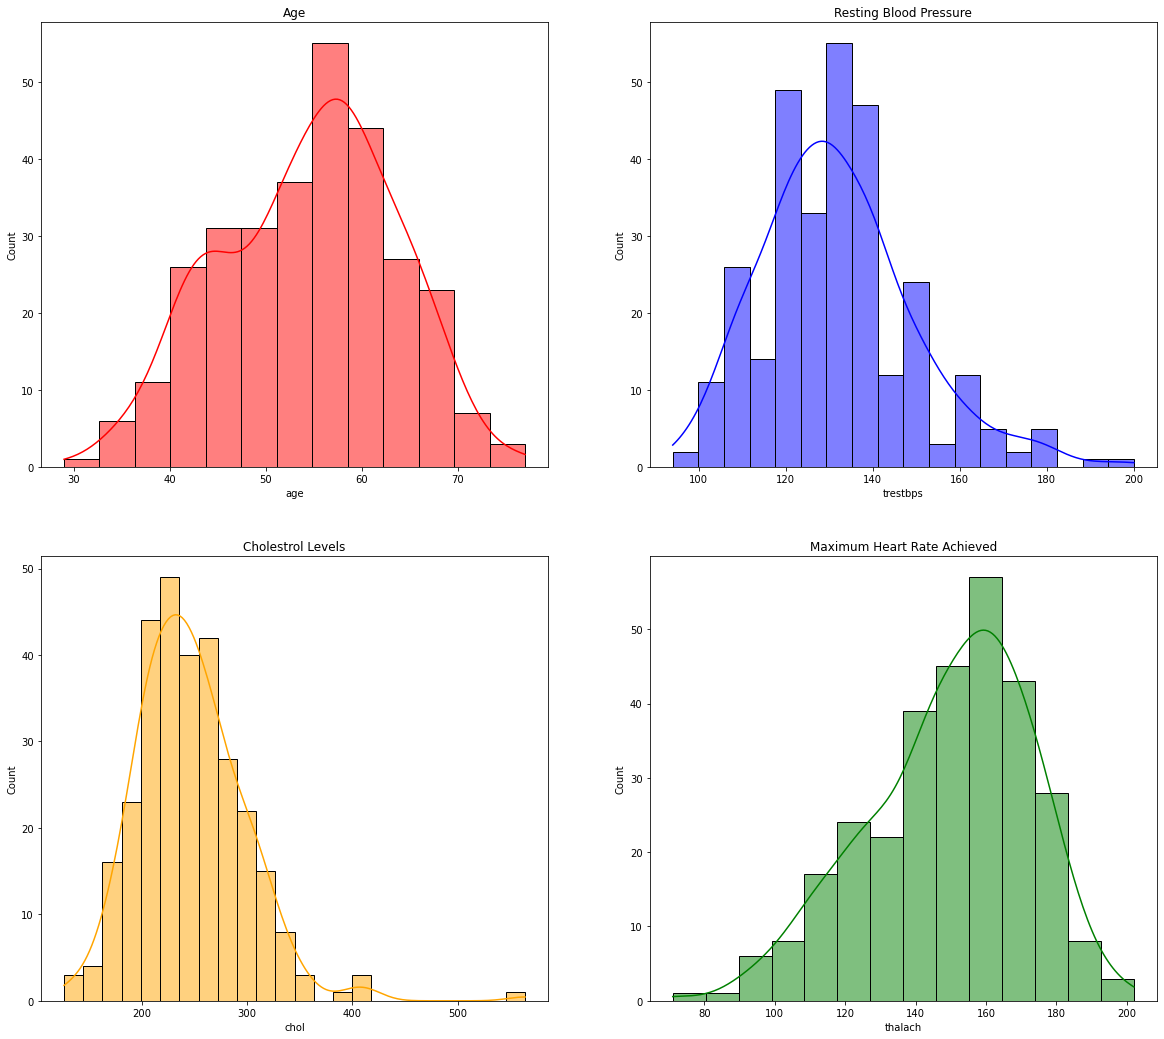

In [18]:
fig, ax = plt.subplots(2,2, figsize=(20,18))
sns.histplot(x=ha["age"], ax=ax[0][0], color="red", kde=True).set(title='Age')
sns.histplot(x=ha["trestbps"], ax=ax[0][1], color="blue", kde=True).set(title='Resting Blood Pressure')
sns.histplot(x=ha["chol"], ax=ax[1][0], color="orange", kde=True).set(title='Cholestrol Levels')
sns.histplot(x=ha["thalach"], ax=ax[1][1], color="green", kde=True).set(title='Maximum Heart Rate Achieved')

**Bivariate analysis**

In [20]:
def bi_ana(df,feature,target):
    sns.set(rc={'figure.figsize':(6,6)})
    
    ax=sns.countplot(x=feature,hue=target,data=df)
    
    for n in ax.patches:
        patch_height=n.get_height()
        if np.isnan(patch_height):
            patch_height=0
        ax.annotate('{}'.format(int(patch_height)), (n.get_x()+0.05, patch_height+10))
    plt.show()

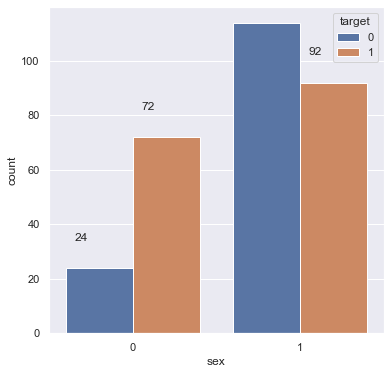

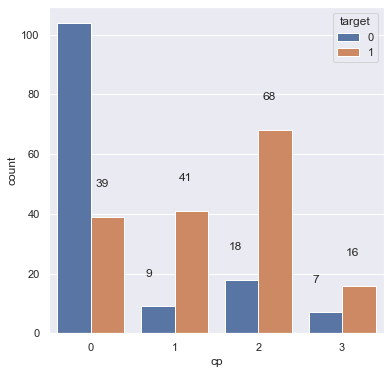

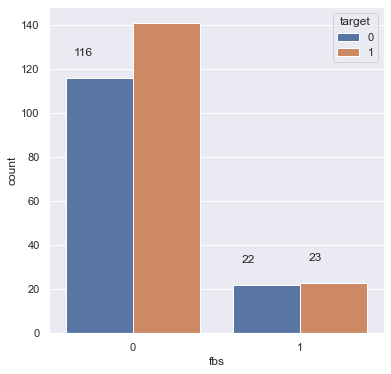

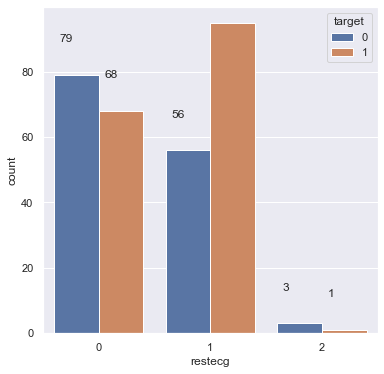

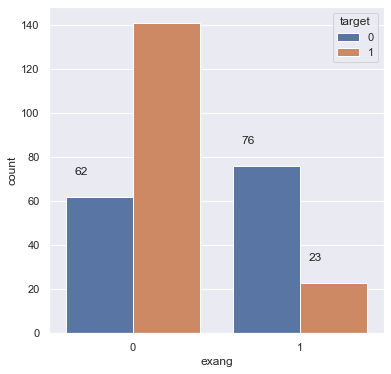

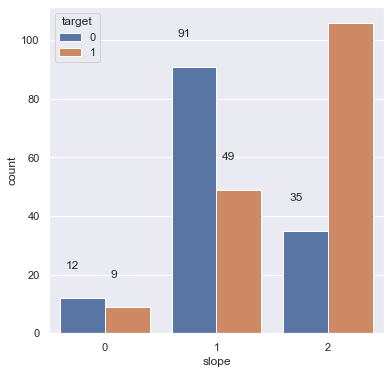

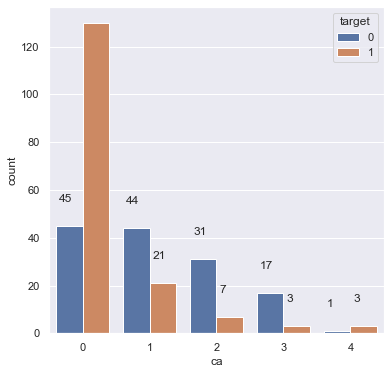

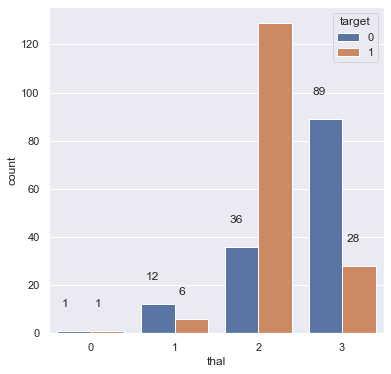

In [23]:
bi_ana(ha,"sex",'target')
bi_ana(ha,"cp",'target')
bi_ana(ha,"fbs",'target')
bi_ana(ha,"restecg",'target')
bi_ana(ha,"exang",'target')
bi_ana(ha,"slope",'target')
bi_ana(ha,"ca",'target')
bi_ana(ha,"thal",'target')

<AxesSubplot:>

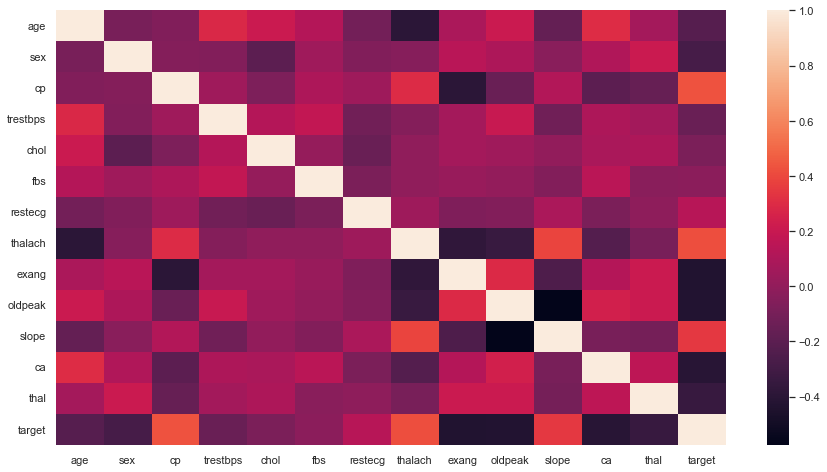

In [27]:
f, ax = plt.subplots(figsize=(15, 8))
corr = ha.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


**Using Machine learning Algorithms**

**1. Logistic Regression**

In [31]:
h_num_cols =['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
h_cat_cols= ['sex', 'cp', 'ca', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [32]:
#importing the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.metrics import accuracy_score

In [33]:
#intializing the model 
LR= LogisticRegression(max_iter=1000)

In [34]:
#Preparing the data
x = ha.drop('target', axis=1)
y = ha['target']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [36]:
print("shape of trainig set:",x_train.shape)
print("shape of testing set:",x_test.shape)

shape of trainig set: (241, 13)
shape of testing set: (61, 13)


In [37]:
#fitting the model 
LR.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [38]:
#predicting 
ypred=LR.predict(x_test)

In [39]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [40]:
#feature importance
importance = list(zip(ha.columns ,LR.coef_.ravel()))
importance = list(sorted(importance, key=lambda x: x[1], reverse=True))
print(importance[0:2])

[('slope', 0.7140462624675704), ('cp', 0.6535321938168929)]


In [41]:
LR_acc_score= accuracy_score(y_test,ypred )
print("Accuracy of LogisticRegression:",LR_acc_score*100)

Accuracy of LogisticRegression: 81.9672131147541


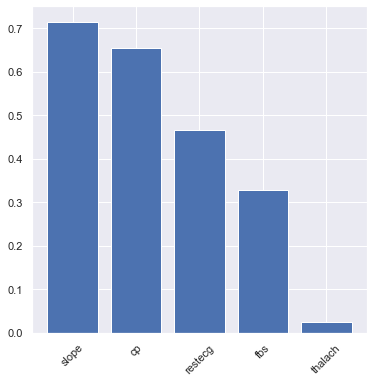

In [42]:
# plot feature importance top 5
top_columns, top_score = zip(*importance[:5])
plt.xticks(rotation=45)
plt.bar(top_columns, top_score)
plt.show()

**2. Random Forest**

In [43]:
#importing model
from sklearn.ensemble import RandomForestClassifier

In [44]:
#intializing the model
rfc= RandomForestClassifier(n_estimators=100)

In [45]:
#fitting the model
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
# predicting
y_pred=rfc.predict(x_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [48]:
rfc_acc_score = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forests Model is: ", rfc_acc_score)

Accuracy of Random Forests Model is:  0.8852459016393442


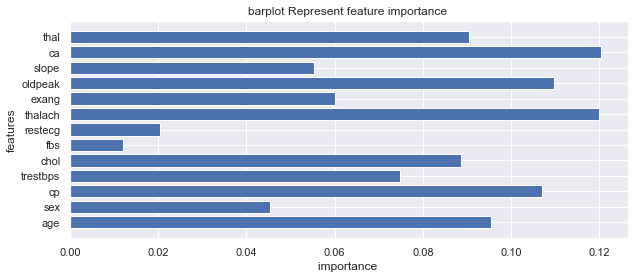

In [49]:
#feature importnace
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': rfc.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

**3.Decision Tree**

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)

In [52]:
print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (241, 13)
Shape of test set: (61, 13)


In [53]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

In [54]:
Y_pred= dt.predict(x_test)

In [55]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [56]:
dt_acc_score= accuracy_score(y_test,Y_pred )
print("Accuracy of decision tree:",dt_acc_score*100)

Accuracy of decision tree: 80.32786885245902


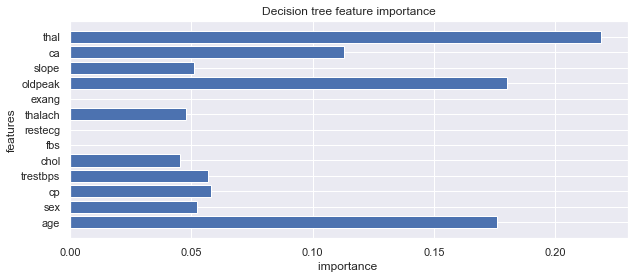

In [57]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': dt.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("Decision tree feature importance")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'])
plt.show()

**4.Extreme Gradient Boost**

**Model comparision**

In [63]:
model=pd.DataFrame({'Model':["Logistic Regression",'Random Forest','Decision Tree'],
                    'Accuracy':[LR_acc_score*100,rfc_acc_score*100,dt_acc_score*100]})
model

,Model,Accuracy
0,Logistic Regression,81.967213
1,Random Forest,88.524590
2,Decision Tree,80.327869


random forest worked the best as the machine leraning models ,giving the highest accuracy.

Feature importance

By comparing the feature importance of all the models , we can say the features which are highly correlated to our target values are 'thal','ca','cp','thalach' and 'age'.

**Conclusion**

If there are pateints with the following symptoms than the possibility of them getting heart attack is high and should be given immediate attention . Following are the factors to look for :

1.number of major vessels - if type 0

2.Chest Pain type - type= non-anginal pain

3.Age of the patient

4.maximum heart rate achieved

5.Sex of the pateint - and especially the male sex as said before males are more likely to get heart attack compared to the females